<a href="https://colab.research.google.com/github/sauravkb94/-DeepLearning-Dog-cat-prediction/blob/main/dog_and_cat_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

# download dataset

In [17]:
!wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download 


--2022-08-30 11:09:20--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘download’

download                [       <=>          ] 812.79M  2.14MB/s    in 3m 11s  

2022-08-30 11:12:33 (4.25 MB/s) - ‘download’ saved [852272294]



In [18]:
import warnings
warnings.filterwarnings("ignore")

# Unzip the Dataset


In [20]:
!unzip /content/download

Streaming output truncated to the last 5000 lines.
 extracting: CatsDogs/Dogs/5499.jpg  
 extracting: CatsDogs/Dogs/55.jpg    
 extracting: CatsDogs/Dogs/550.jpg   
 extracting: CatsDogs/Dogs/5500.jpg  
 extracting: CatsDogs/Dogs/5501.jpg  
 extracting: CatsDogs/Dogs/5502.jpg  
 extracting: CatsDogs/Dogs/5503.jpg  
 extracting: CatsDogs/Dogs/5504.jpg  
 extracting: CatsDogs/Dogs/5505.jpg  
 extracting: CatsDogs/Dogs/5506.jpg  
 extracting: CatsDogs/Dogs/5507.jpg  
 extracting: CatsDogs/Dogs/5508.jpg  
 extracting: CatsDogs/Dogs/5509.jpg  
 extracting: CatsDogs/Dogs/551.jpg   
 extracting: CatsDogs/Dogs/5510.jpg  
 extracting: CatsDogs/Dogs/5511.jpg  
 extracting: CatsDogs/Dogs/5512.jpg  
 extracting: CatsDogs/Dogs/5513.jpg  
 extracting: CatsDogs/Dogs/5514.jpg  
 extracting: CatsDogs/Dogs/5515.jpg  
 extracting: CatsDogs/Dogs/5516.jpg  
 extracting: CatsDogs/Dogs/5517.jpg  
 extracting: CatsDogs/Dogs/5518.jpg  
 extracting: CatsDogs/Dogs/5519.jpg  
 extracting: CatsDogs/Dogs/552.jpg   

#Import Modules

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array

# Model Building

In [22]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

In [23]:
for layer in base_model.layers:
  layer.trainable = False

In [24]:
X = Flatten()(base_model.output)
X = Dense(units=2 , activation= 'sigmoid')(X)

# final model
model = Model(base_model.input , X)

#compile the model
model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy,metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Create Dataframe for Input and Output

In [25]:
input_path = []
label = []

for class_name in os.listdir("CatsDogs"):
    for path in os.listdir("CatsDogs/"+class_name):
        if class_name == 'Cats':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("CatsDogs", class_name, path))
print(input_path[0], label[0])

CatsDogs/Cats/1585.jpg 0


In [26]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,CatsDogs/Dogs/846.jpg,1
1,CatsDogs/Cats/1784.jpg,0
2,CatsDogs/Dogs/1368.jpg,1
3,CatsDogs/Dogs/8175.jpg,1
4,CatsDogs/Dogs/10498.jpg,1


In [27]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [28]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['CatsDogs/Dogs/11702.jpg', 'CatsDogs/Cats/666.jpg']

In [29]:
# delete db files
df = df[df['images']!='CatsDogs/Dogs/11702.jpg']
df = df[df['images']!='CatsDogs/Cats/666.jpg']
len(df)

24998

# Exploratory Data Analysis

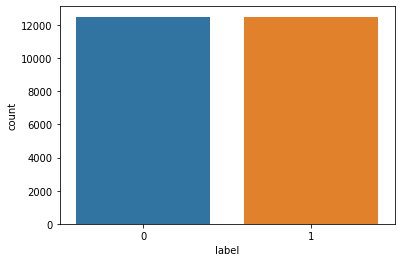

In [30]:
import seaborn as sns
sns.countplot(df['label'])

# Create DataGenerator for the Images 

In [31]:
df['label'] = df['label'].astype('str')

In [32]:
df.head()

,images,label
0,CatsDogs/Dogs/846.jpg,1
1,CatsDogs/Cats/1784.jpg,0
2,CatsDogs/Dogs/1368.jpg,1
3,CatsDogs/Dogs/8175.jpg,1
4,CatsDogs/Dogs/10498.jpg,1


# Pre-Processing Data using Data Generator

In [33]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [38]:
train_generator = ImageDataGenerator(featurewise_center=True ,
                                   rotation_range=0.4, 
                                   width_shift_range=0.3, 
                                   horizontal_flip=True,
                                   preprocessing_function= preprocess_input, 
                                   zoom_range= 0.4, 
                                   shear_range = 0.4)

train_data = train_generator.flow_from_directory(directory = "/content/CatsDogs", 
                                               target_size=(256, 256), 
                                               batch_size = 36)



Found 25000 images belonging to 2 classes.


In [39]:
train_data.class_indices

{'Cats': 0, 'Dogs': 1}

# Visulizing the data

In [40]:
t_img , label = train_data.next()

In [ ]:
t_img

In [42]:
t_img.shape

(36, 256, 256, 3)

In [43]:
def plotImages(img_arr, label):
  """
  input : image_array
  output: plot images
  """

  for idx, img in enumerate(img_arr) :

    if idx <= 10 :

      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

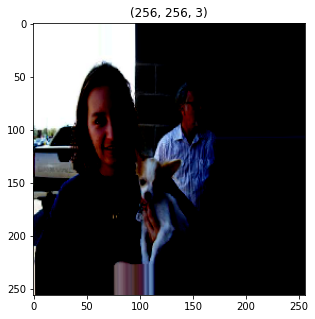

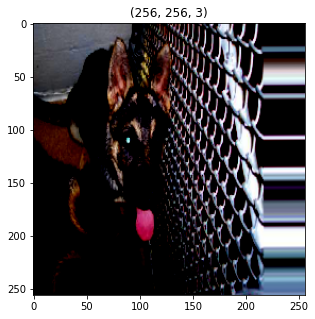

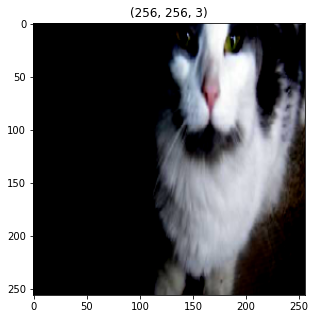

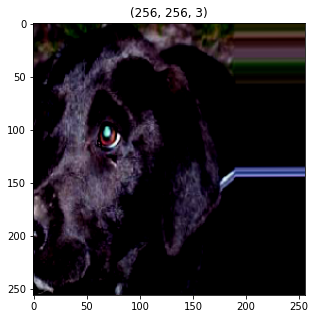

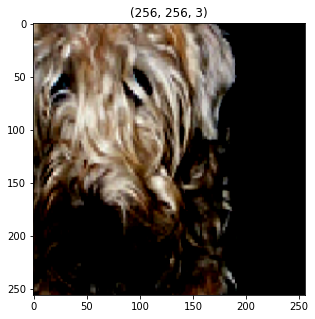

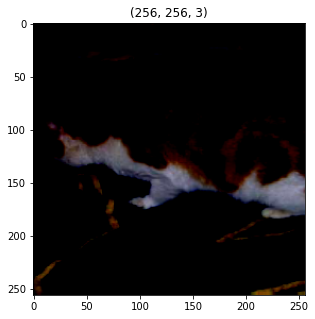

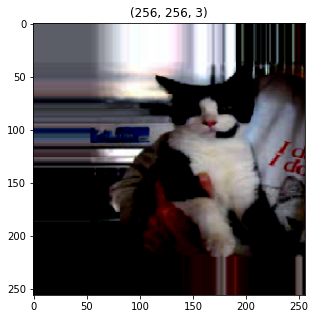

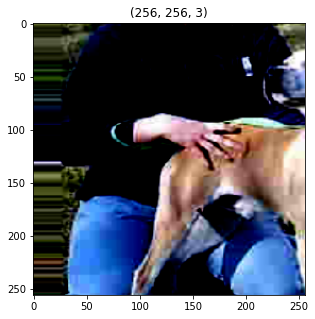

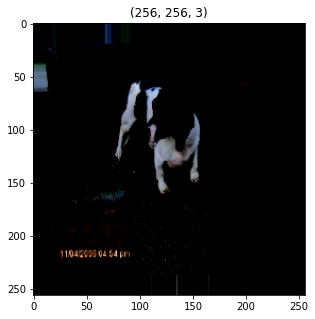

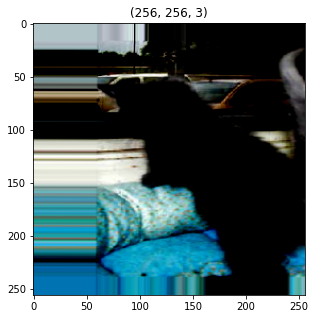

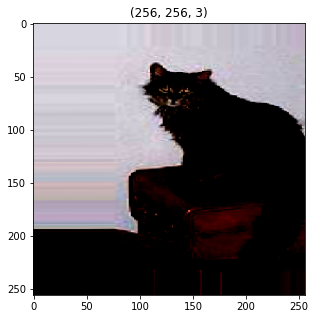

In [44]:
plotImages(t_img, label)

# Model Check point 


In [45]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc  = ModelCheckpoint(filepath = "./test_model.h5",
                      monitor="accuracy",
                      verbose=1,
                      save_best_only = True)

es = EarlyStopping(monitor = "accuracy", 
                   min_delta= 0.01, 
                   patience = 5, 
                   verbose = 1)

cb = [mc, es]

In [47]:
his = model.fit_generator (train_data, steps_per_epoch=10, epochs = 30,callbacks = cb) 

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.8306
Epoch 1: accuracy improved from -inf to 0.83056, saving model to ./test_model.h5
10/10 [==============================] - 14s 606ms/step - loss: 0.6666 - accuracy: 0.8306
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.9472
Epoch 2: accuracy improved from 0.83056 to 0.94722, saving model to ./test_model.h5
10/10 [==============================] - 7s 665ms/step - loss: 0.4066 - accuracy: 0.9472
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.9750
Epoch 3: accuracy improved from 0.94722 to 0.97500, saving model to ./test_model.h5
10/10 [==============================] - 7s 669ms/step - loss: 0.1836 - accuracy: 0.9750
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.2342 - accuracy: 0.9639
Epoch 4: accuracy did not improve from 0.97500
10/10 [==============================] - 6s 573ms/step - los

In [48]:
from keras.models import load_model

model = load_model("/content/test_model.h5") 


In [49]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

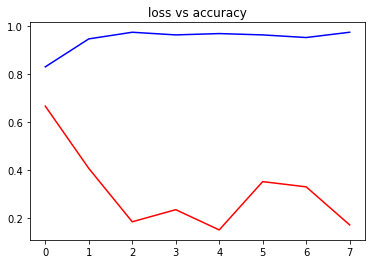

In [50]:
plt.plot(h['loss'], c= "red")
plt.plot(h['accuracy'], c = "blue",)

plt.title("loss vs accuracy")
plt.show()

#Validate our Model

This image is of cat


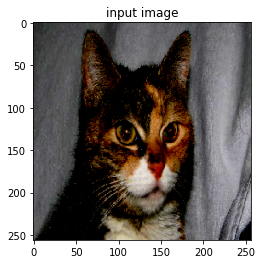

In [51]:

# path for the image  to see is it predics correct class

path= "/content/CatsDogs/Cats/10006.jpg"
img = load_img(path, target_size=(256,256) )

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))


if pred == 0:
  print("This image is of cat")
else:
  print ("This image is of dog")

#to display the imgae 
plt.imshow(input_arr[0])
plt.title("input image")
plt.show() 



This image is of dog


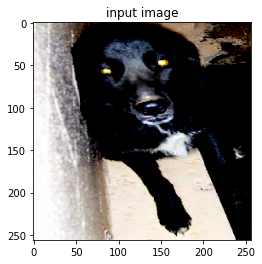

In [52]:
path= "/content/CatsDogs/Dogs/10000.jpg"
img = load_img(path, target_size=(256,256) )

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))


if pred == 0:
  print("This image is of cat")
else:
  print ("This image is of dog")

#to display the imgae 
plt.imshow(input_arr[0])
plt.title("input image")
plt.show() 


# GRAD-CAM

In [65]:
def get_img_array(img_path):

  img = load_img(img_path, target_size=(256, 256) )

  img = img_to_array(img)
  img = preprocess_input(img)

  input_arr = np.array([img])

  return input_arr

In [66]:
import tensorflow as tf

In [67]:
def make_gradcamheatmap(img_arr, model, last_conv_layer_name, pred_index = None):
  
  grad_model = tf.keras.models.Model(
      [model.input], [model.get_layer(last_conv_layer_name).output, model.output]
  )

  with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(img_arr)

    if pred_index is None: 
      pred_index = tf.argmax(preds[0])
    
    class_channel = preds[:,pred_index]

  grads = tape.gradient(class_channel, last_conv_layer_output)

  pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

  last_conv_layer_output = last_conv_layer_output[0]

  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]

  heatmap = tf.squeeze(heatmap)

  heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

  return heatmap.numpy()

In [68]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [69]:
def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
  img = img_to_array(load_img(img_path) )

  heatmap = np.uint8(255 * heatmap)

  jet = cm.get_cmap("jet")

  jet_colors = jet(np.arange(256))[:,:3]
  jet_heatmap = jet_colors[heatmap]

  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  superimposed_img = jet_heatmap * alpha + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)


  superimposed_img.save(cam_path)

  display(Image(cam_path))

In [70]:
def image_prediction_and_visualization(path, last_conv_layer_name = "conv2d_93", model = model):


  img_array = get_img_array(path)

  heatmap = make_gradcamheatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()

  pred = np.argmax(model.predict(img_array))
  print()
  print()
  print()

  if pred == 0:
    print("The image is of a Cat")
  else:
    print("The image is of a Dog")

  print()

  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

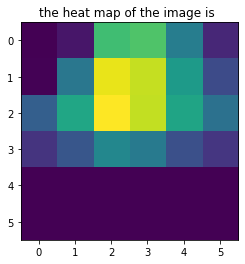




The image is of a Dog



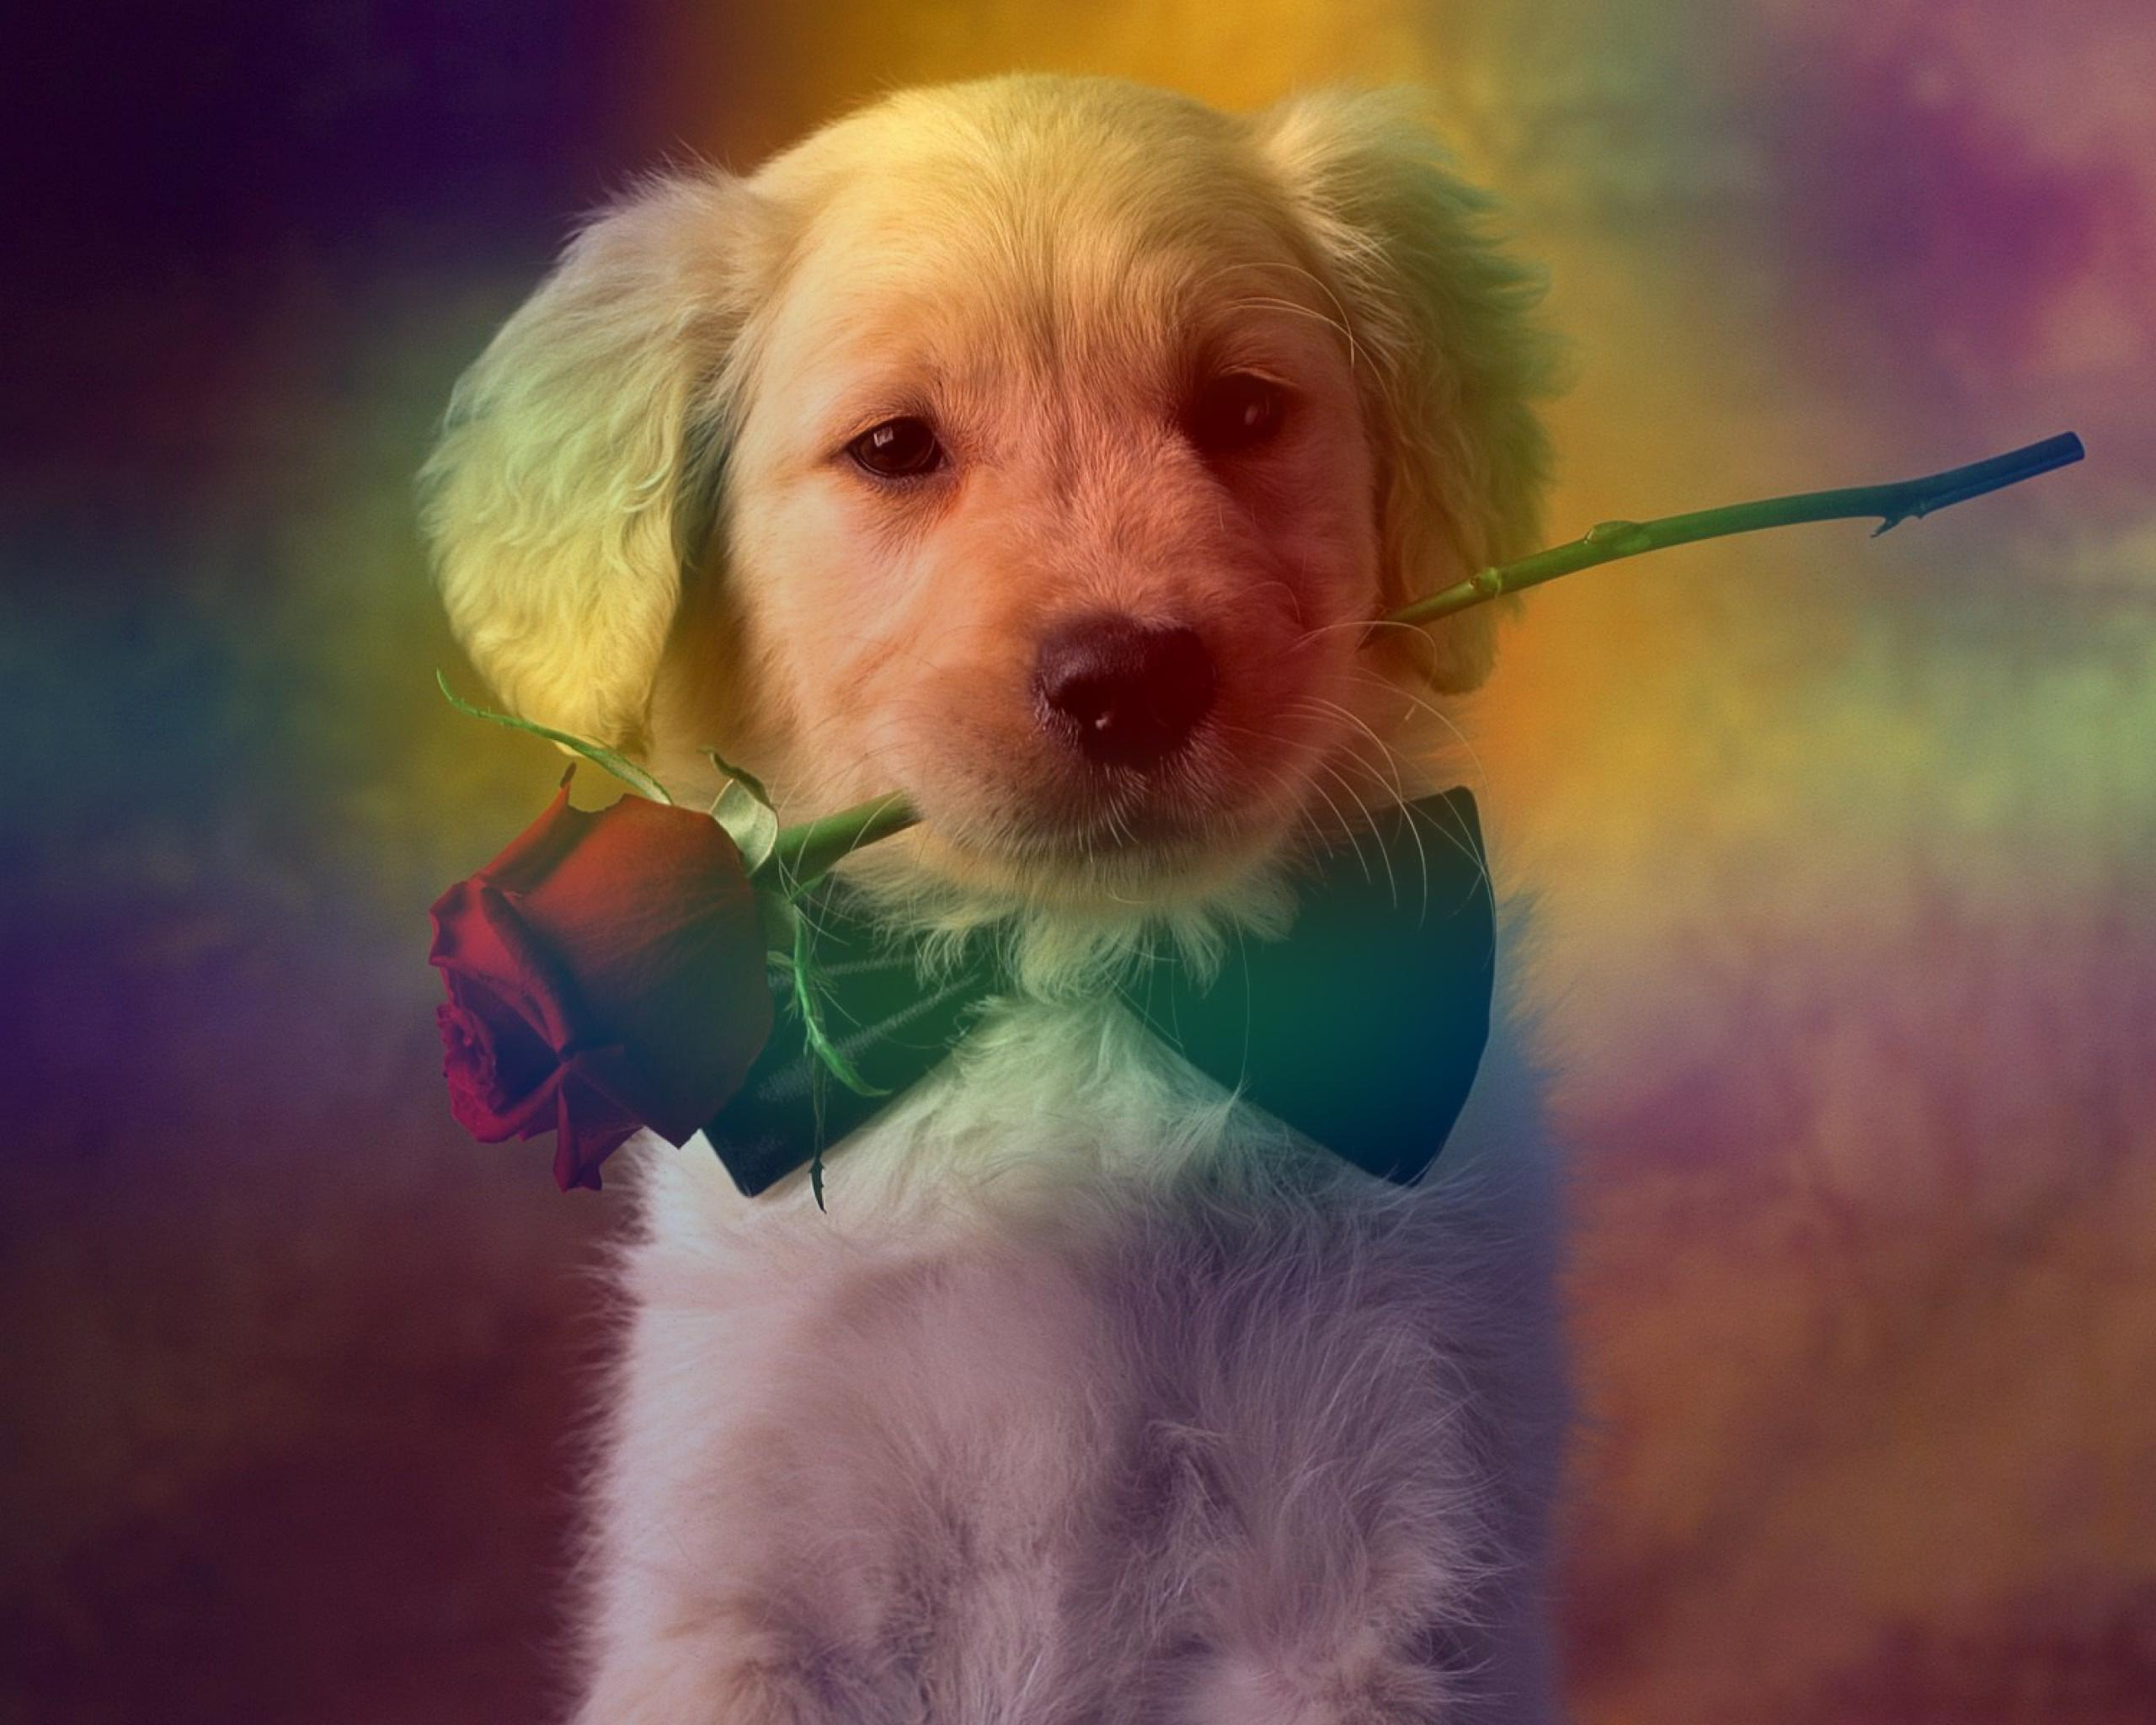


the original input image



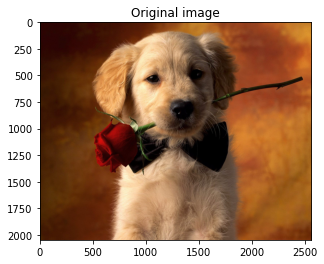

In [59]:
path = "/content/R.jpg"
image_prediction_and_visualization(path)